In [351]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = np.genfromtxt("data/data.csv",delimiter=',',skip_header=1)

In [356]:
class LinearRegression():
    def __init__(self):
        self.theta = (0,0)
        
    ## Predictions
    def estimatePrice(self, theta0, theta1, mileage):
        return theta0 + theta1 * mileage

    def vec_estimatePrice(self, theta0, theta1) :
        return np.vectorize(lambda x : self.estimatePrice(theta0, theta1, x))
    
    
    ## Model training
    def norm_mileage(data):
        mileage_mean = np.mean(data[:,0])
        mileage_std = np.std(data[:,0])
        new_data = np.column_stack(((data[:,0]-mileage_mean)/mileage_std,data[:,1]))
        return(new_data,mileage_mean,mileage_std)

    def update_theta(theta_old,data_normed,learning_rate):
        prices = data_normed[:,1]
        mileages= data_normed[:,0]
        estimates = theta_old[0]+theta_old[1]*mileages
        m = prices.size
        theta0_grad = 2*np.mean(np.add(estimates,-prices))
        theta1_grad = 2*np.mean(np.multiply(np.add(estimates,-prices),mileages))
        return (theta_old[0]-learning_rate*theta0_grad,theta_old[1]-learning_rate*theta1_grad)
    
    def correct_theta(theta,mileage_mean,mileage_std):
        return(theta[0]-mileage_mean/mileage_std,theta[1]/mileage_std)
    
    def train(self,data,iterations = 200, learning_rate = 0.01):
        theta = self.theta
        (data_normed,mileage_mean,mileage_std) = norm_mileage(data)
        for i in range(0,iterations):
            theta = update_theta(theta,data_normed,learning_rate)
        theta = correct_theta(theta,mileage_mean,mileage_std)
        self.theta = theta
    
    ## Extra
    def loss_evolution(self,data, iterations = 200, learning_rate = 0.01):
        all_theta = np.array([[0,0]])
        (data_normed,mileage_mean,mileage_std) = norm_mileage(data)
        for i in range(0,iterations-1):
            new_theta = update_theta(all_theta[-1],data_normed,learning_rate)
            new_theta = correct_theta(new_theta,mileage_mean,mileage_std)
            all_theta = np.concatenate((all_theta,[new_theta]),axis=0)
        predictions = np.outer(all_theta[:,0],np.ones(data[:,0].size)) + np.outer(all_theta[:,1],(data[:,0]))
        loss = np.average(np.square(predictions - data[:,1]), axis=1)
        return(loss)
    
    def plot_loss_evolution(self,data, iterations = 200, learning_rate = 0.01):
        loss = self.loss_evolution(data, iterations, learning_rate)
        plt.plot(loss)
        plt.show
    
    def predict(self):
        all_theta0, all_theta1 = self.train()
        final_theta0, final_theta1 = all_theta0[-1], all_theta1[-1]
        predict = final_theta0 + final_theta1 * self.kms
        return predict

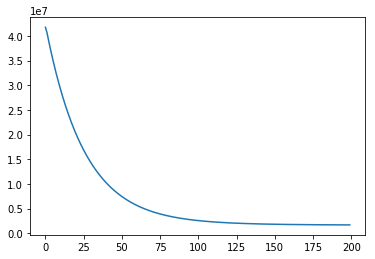

In [357]:
loss = LinearRegression()
loss.plot_loss_evolution(data)